In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pathlib import Path
import numpy as np

In [ ]:
train_dataset, metadata = tfds.load("iris", with_info=True, as_supervised=True, split="train", batch_size=32)
num_examples = metadata.splits["train"].num_examples
num_classes = metadata.features["label"].num_classes
labels = metadata.features["label"].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/iris/2.0.0.incompleteQ7KQS6/iris-train.tfrecord*...:   0%|          | 0/150 [0…

Dataset iris downloaded and prepared to ~/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


In [ ]:
metadata

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='~/tensorflow_datasets/iris/2.0.0',
    file_format=tfrecord,
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitI

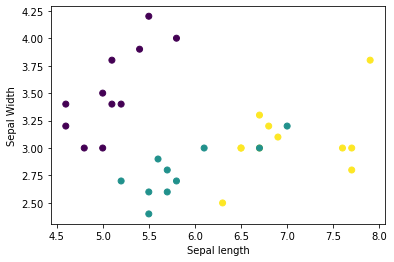

In [ ]:
features, labels = next(iter(train_dataset))
sepal_length = features[:,0]
sepal_width = features[:,1]

plt.scatter(sepal_length,
            sepal_width,
            c=labels,
            cmap='viridis')
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.show()

Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 1.7722 - accuracy: 0.1200
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 1.5339 - accuracy: 0.2133
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 1.3405 - accuracy: 0.1733
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 1.2789 - accuracy: 0.2667
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 1.1939 - accuracy: 0.3933
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.5267
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9687 - accuracy: 0.6333
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.9241 - accuracy: 0.6467
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9078 - accuracy: 0.6533
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8995 - accuracy: 0.6600
Epoch 11/50
5/5 [======================

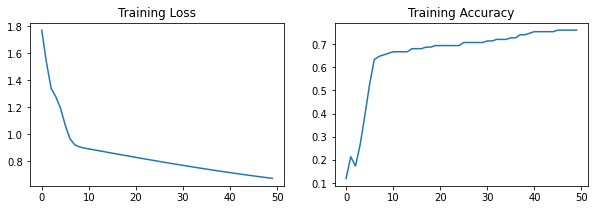

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,), name= "input"), 
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, name="output")
])

# dot_img_file = '/tmp/model_1.png'
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()
opt_fun = tf.keras.optimizers.Adam()
model.compile(optimizer=opt_fun, loss=loss_fun, metrics=['accuracy'] )
history = model.fit(train_dataset, batch_size=12, epochs=50)

acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1)
ax.set_title("Training Loss")
ax.plot(loss)
ax = plt.subplot(1, 2, 2)
ax.set_title("Training Accuracy")
ax.plot(acc)
plt.show()

In [ ]:
predictions = model.predict([[0.5, 0.4, 0.8, 0.4]])

1/1 [==============================] - 0s 105ms/step


In [ ]:
predictions

array([[0.7158209 , 0.21446823, 0.06971084]], dtype=float32)

In [ ]:
MODEL_DIR = Path("/content/iris_model/")

In [ ]:
model.save(MODEL_DIR, save_format="tf")

In [ ]:
!ls -l {MODEL_DIR}

total 156
drwxr-xr-x 2 root root   4096 Nov 12 13:39 assets
-rw-r--r-- 1 root root  10877 Nov 12 13:45 keras_metadata.pb
-rw-r--r-- 1 root root 139194 Nov 12 13:45 saved_model.pb
drwxr-xr-x 2 root root   4096 Nov 12 13:45 variables


In [ ]:
!saved_model_cli show --dir {MODEL_DIR} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 4)
        name: serving_default_input_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['output'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 3)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          input_input: Tensor

In [ ]:
import shutil
from pathlib import Path
from google.colab import files
import sys

def folder_to_zip(folder_path):
    folder_path = Path(folder_path)
    if not folder_path.exists():
        return
    shutil.make_archive(folder_path.name, 'zip', folder_path)
    return folder_path.with_suffix(".zip")

def zip_and_download_folder_content(model_folder):
    zip_file = folder_to_zip(model_folder)
    files.download(zip_file)


In [ ]:
zip_and_download_folder_content("iris_model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>